In [1]:
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


import seaborn as sns 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  #import Vader

analyzer = SentimentIntensityAnalyzer()                               #Initialize Vader


df = pd.read_csv('noisetweets.csv', parse_dates = True)               # Load dataset to dataframe

analyzer.polarity_scores(str(df['tweet_clean'][6]))                   # Generate sentiment with Vader

{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.7584}

In [130]:
#import pandas_profiling 
#!pip install pandas_profiling

  Using cached https://files.pythonhosted.org/packages/45/ad/24a16fa4ba612fb96a3c4bb115a5b9741483f53b66d3d3afd987f20fa227/phik-0.9.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/42/ff/ba2c7ee7140934de56baec3e8e7ca57f4709bb6260a5261749256ec5a0e9/numba-0.45.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/f1/4fa99c2079132da8694361fb9a19094616f1ba2c2eae610379e75394575f/llvmlite-0.29.0-cp36-cp36m-manylinux1_x86_64.whl


ERROR: phik 0.9.8 has requirement matplotlib>=2.2.3, but you'll have matplotlib 2.2.2 which is incompatible.
ERROR: phik 0.9.8 has requirement pandas>=0.23.4, but you'll have pandas 0.23.0 which is incompatible.
  Found existing installation: llvmlite 0.23.1
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [131]:
#!pip install --upgrade --force-reinstall llvmlite==0.27.0

  Using cached https://files.pythonhosted.org/packages/17/2f/e7f053e8f2616eae980a9a5d352f6cfeff2abb5f88cc0530b23c61713afa/llvmlite-0.27.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: llvmlite 0.23.1
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


# Noise

In [132]:
df = pd.read_csv('noisetweets.csv', parse_dates = True)
analyzer.polarity_scores(str(df['tweet_clean'][6]))#['neg']  # remove the range later
df.head(3).transpose()


mo = df.copy()
mo.head(1).transpose()



#mo.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)

#mo.to_csv('noise sentiment preprocessed.csv', header=True, index=False)

,0
date,2014-12-27 14:36:23
favorites,0
hashtags,#Kowloon #ExoticFood #HongKong
mentions,@Kowloon
replies,0
retweets,0
text,Kowloon food. Noise louder than taste. yummy a...
to,NaN
username,svetothefool
tweet_clean,Kowloon food Noise louder than taste yummy any...


In [133]:
conv = list((df['tweet_clean']))

nega = []
posi = []
neut = []
comp = []

for n in conv:
    nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    comp.append(analyzer.polarity_scores(c)['compound'])
  

df['vader_pos'] = posi
df['Tweet_Noise'] = nega
df['vader_neu'] = nega
df['vader_comp'] = comp

df.head().transpose()

,0,1,2,3,4
date,2014-12-27 14:36:23,2014-12-18 18:31:44,2014-12-15 23:25:09,2014-12-10 11:57:30,2014-11-29 18:11:45
favorites,0,0,0,0,0
hashtags,#Kowloon #ExoticFood #HongKong,#iPad,#oos #oosmusic #edm #hk #hongkong,NaN,NaN
mentions,@Kowloon,@freakonomics,NaN,@psychicteeth @KommanderKlobb,NaN
replies,0,0,0,0,0
retweets,0,0,0,0,0
text,Kowloon food. Noise louder than taste. yummy a...,@freakonomics I always thought that what #iPad...,Pls leave me alone and let me think about all ...,@psychicteeth @KommanderKlobb *whip noise* YEAH,We can't put it aside. The noise here is prett...
to,NaN,NaN,NaN,psychicteeth,NaN
username,svetothefool,happywaiman,swed_official,devbradmarr,Akinjiola
tweet_clean,Kowloon food Noise louder than taste yummy any...,I always thought that what #iPad and noise can...,Pls leave me alone and let me think about all ...,*whip noise YEAH,We can't put it aside The noise here is pretty...


# Waste

In [134]:
import re
from textblob import TextBlob

data1 = pd.read_csv('data/2008-2014 Waste.csv')
data2 = pd.read_csv('data/2015-2019 Waste.csv')

data1.head(2).transpose()
data2.head(2).transpose()  # Comment one to show the other. 


wastedf = pd.concat([data1, data2], sort=True)
wastedf = wastedf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

wastedf['tweet_clean'] = wastedf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
wastedf['tweet_sentiment'] = wastedf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

wastedf.head(3).transpose()
                     
                     
mowaste = wastedf.copy()
mowaste.head()

#mowaste.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)
#mowaste.to_csv('waste sentiment preprocessed.csv', header=True, index=False)

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment
0,2014-12-22 11:37:22,0,#KayRoItsComplicated,NaN,0,1,"Don't waste your time on him, if he won't give...",NaN,villavicenci0j,Don't waste your time on him if he won't give ...,positive
1,2014-12-21 13:48:01,0,NaN,@tumblrkowts,0,0,“ @tumblrkowts: if you're lucky enough to get ...,tumblrkowts,jairaalyssa,if you're lucky enough to get a second chance ...,positive
2,2014-12-21 08:28:06,0,#springworkshop_hkfarm #wongchukhang #hongkong,@Spring,0,0,Coffee ground and juice waste from Mum cafe #s...,NaN,Studio_Leung,Coffee ground and juice waste from Mum cafe #s...,negative
3,2014-12-19 08:40:27,0,NaN,@darrenaticsMAC1 @900Madrona,1,0,@darrenaticsMAC1 @900Madrona don't waste our t...,OMerciales,OMerciales,don't waste our tweet Pls vote.DarrenTheTotal ...,negative
4,2014-12-11 04:31:35,0,#DontFlyJetstar,@JetstarAirways,1,0,@JetstarAirways Waste of Time and Waste of Mon...,NaN,carileee,Waste of Time and Waste of Money #DontFlyJetst...,negative


In [135]:
conv = list((wastedf['tweet_clean']))

waste_nega = []
waste_posi = []
waste_neut = []
waste_comp = []

for n in conv:
    waste_nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    waste_posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    waste_neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    waste_comp.append(analyzer.polarity_scores(c)['compound'])
  



wastedf['vader_pos'] = waste_posi
wastedf['Tweet_Waste'] = waste_nega
wastedf['vader_neu'] = waste_neut
wastedf['vader_comp'] = waste_comp

#wastedf.drop(['hashtags', 'username', 'to', 'text', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)
wastedf.head()

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Tweet_Waste,vader_neu,vader_comp
0,2014-12-22 11:37:22,0,#KayRoItsComplicated,NaN,0,1,"Don't waste your time on him, if he won't give...",NaN,villavicenci0j,Don't waste your time on him if he won't give ...,positive,0.115,0.000,0.885,0.3252
1,2014-12-21 13:48:01,0,NaN,@tumblrkowts,0,0,“ @tumblrkowts: if you're lucky enough to get ...,tumblrkowts,jairaalyssa,if you're lucky enough to get a second chance ...,positive,0.471,0.000,0.529,0.7296
2,2014-12-21 08:28:06,0,#springworkshop_hkfarm #wongchukhang #hongkong,@Spring,0,0,Coffee ground and juice waste from Mum cafe #s...,NaN,Studio_Leung,Coffee ground and juice waste from Mum cafe #s...,negative,0.000,0.203,0.797,-0.4215
3,2014-12-19 08:40:27,0,NaN,@darrenaticsMAC1 @900Madrona,1,0,@darrenaticsMAC1 @900Madrona don't waste our t...,OMerciales,OMerciales,don't waste our tweet Pls vote.DarrenTheTotal ...,negative,0.248,0.000,0.752,0.3883
4,2014-12-11 04:31:35,0,#DontFlyJetstar,@JetstarAirways,1,0,@JetstarAirways Waste of Time and Waste of Mon...,NaN,carileee,Waste of Time and Waste of Money #DontFlyJetst...,negative,0.000,0.288,0.712,-0.7959


# Parking 

In [136]:
data3 = pd.read_csv('data/2008-2014 Parking.csv')
data4 = pd.read_csv('data/2015-2019 parking.csv')

data3.head(2).transpose()
data4.head(2).transpose()  # Comment one to show the other. 


parkdf = pd.concat([data3, data4], sort=True)
parkdf = parkdf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

parkdf['tweet_clean'] = parkdf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
parkdf['tweet_sentiment'] = parkdf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

#parkdf.transpose()


                     
mopark = parkdf.copy()
mopark.head()

#mopark.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)
#mopark.to_csv('park sentiment preprocessed.csv', header=True, index=False)

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment
0,2014-12-28 05:53:11,0,#asia #china #shenzhen #Beijing #EDM #HongKong...,NaN,0,0,"Golf at the parking?? Ye, Why not [呲牙] #asia #...",NaN,swed_official,Golf at the parking? Ye Why not [呲牙 #asia #chi...,neutral
1,2014-11-26 10:45:27,0,NaN,@Victoria,0,0,Parking lot @Victoria Harbour http://instagram...,NaN,loskaufmanos,Parking lot Harbour http://instagram.com/p/v3C...,neutral
2,2014-11-13 04:36:14,0,#badplanning,NaN,0,0,This is a legal parking space blocking a fire ...,NaN,glennhk,This is a legal parking space blocking a fire ...,negative
3,2014-11-10 06:34:12,0,NaN,@alxdwn @brettking @RHaccart,2,0,@alxdwn @brettking @RHaccart Closed-loop syste...,alxdwn,jamesplloyd,Closed-loop system but allows for auto credit ...,neutral
4,2014-11-09 09:44:52,0,NaN,NaN,1,0,9 Big 30+ bus parked Infront of Central Police...,NaN,CafeLoisl,9 Big 30 bus parked Infront of Central Police ...,positive


In [137]:
conv = list((parkdf['tweet_clean']))

park_nega = []
park_posi = []
park_neut = []
park_comp = []

for n in conv:
    park_nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    park_posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    park_neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    park_comp.append(analyzer.polarity_scores(c)['compound'])
  



parkdf['vader_pos'] = park_posi
parkdf['Tweet_Parking'] = park_nega
parkdf['vader_neu'] = park_neut
parkdf['vader_comp'] = park_comp

#parkdf.drop(['hashtags', 'username', 'to', 'text', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)
parkdf.head()

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Tweet_Parking,vader_neu,vader_comp
0,2014-12-28 05:53:11,0,#asia #china #shenzhen #Beijing #EDM #HongKong...,NaN,0,0,"Golf at the parking?? Ye, Why not [呲牙] #asia #...",NaN,swed_official,Golf at the parking? Ye Why not [呲牙 #asia #chi...,neutral,0.000,0.000,1.000,0.0000
1,2014-11-26 10:45:27,0,NaN,@Victoria,0,0,Parking lot @Victoria Harbour http://instagram...,NaN,loskaufmanos,Parking lot Harbour http://instagram.com/p/v3C...,neutral,0.000,0.000,1.000,0.0000
2,2014-11-13 04:36:14,0,#badplanning,NaN,0,0,This is a legal parking space blocking a fire ...,NaN,glennhk,This is a legal parking space blocking a fire ...,negative,0.081,0.435,0.484,-0.7650
3,2014-11-10 06:34:12,0,NaN,@alxdwn @brettking @RHaccart,2,0,@alxdwn @brettking @RHaccart Closed-loop syste...,alxdwn,jamesplloyd,Closed-loop system but allows for auto credit ...,neutral,0.185,0.000,0.815,0.5267
4,2014-11-09 09:44:52,0,NaN,NaN,1,0,9 Big 30+ bus parked Infront of Central Police...,NaN,CafeLoisl,9 Big 30 bus parked Infront of Central Police ...,positive,0.000,0.000,1.000,0.0000


# Air Pollution

In [138]:
data5 = pd.read_csv('data/2008-2014 Air+Pollution.csv')
data6 = pd.read_csv('data/2015-2019 Air+Pollution.csv')

data5.head(2).transpose()
data6.head(2).transpose()  # Comment one to show the other. 


airdf = pd.concat([data5, data6], sort=True)
airdf = airdf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

airdf['tweet_clean'] = airdf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
airdf['tweet_sentiment'] = airdf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

#parkdf.transpose()


                     
moair = airdf.copy()
moair.head()
#moair.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)
#moair.to_csv('airpollution sentiment preprocessed.csv', header=True, index=False)

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment
0,2014-12-13 23:23:00,0,NaN,@BDUTT,0,0,"Reached Alarming proportion.! RT "" @BDUTT: Won...",NaN,ptiwari007,Reached Alarming proportion. RT Wonder why air...,negative
1,2014-11-05 13:32:01,0,#APEC #Epic,@niubi @PaulCarsten,0,0,@niubi @PaulCarsten Ever heard this？ How Beiji...,NaN,SummerKar,Ever heard this How Beijingers interpret #APEC...,positive
2,2014-10-15 10:46:31,0,#what #the #weather #fogy #day #why #all #air ...,@somewhere,0,0,#what #the #weather #fogy #day #why #all #air ...,NaN,Leggotunglei,#what #the #weather #fogy #day #why #all #air ...,neutral
3,2014-09-30 05:58:12,0,NaN,@Kkmall,0,0,Hong Kong qu nar? Sweet Jesus!!! Air pollution...,NaN,Angiesamai,Hong Kong qu nar Sweet Jesus!! Air pollution g...,positive
4,2014-09-30 04:28:54,0,NaN,NaN,0,0,I wonder if the roadside air pollution around ...,NaN,smartjolin,I wonder if the roadside air pollution around ...,positive


In [139]:
conv = list((airdf['tweet_clean']))

air_nega = []
air_posi = []
air_neut = []
air_comp = []

for n in conv:
    air_nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    air_posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    air_neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    air_comp.append(analyzer.polarity_scores(c)['compound'])
  



airdf['vader_pos'] = air_posi
airdf['Tweet_AirPollution'] = air_nega
airdf['vader_neu'] = air_neut
airdf['vader_comp'] = air_comp

#parkdf.drop(['hashtags', 'username', 'to', 'text', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)
airdf.head()

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Tweet_AirPollution,vader_neu,vader_comp
0,2014-12-13 23:23:00,0,NaN,@BDUTT,0,0,"Reached Alarming proportion.! RT "" @BDUTT: Won...",NaN,ptiwari007,Reached Alarming proportion. RT Wonder why air...,negative,0.064,0.248,0.688,-0.6124
1,2014-11-05 13:32:01,0,#APEC #Epic,@niubi @PaulCarsten,0,0,@niubi @PaulCarsten Ever heard this？ How Beiji...,NaN,SummerKar,Ever heard this How Beijingers interpret #APEC...,positive,0.000,0.000,1.000,0.0000
2,2014-10-15 10:46:31,0,#what #the #weather #fogy #day #why #all #air ...,@somewhere,0,0,#what #the #weather #fogy #day #why #all #air ...,NaN,Leggotunglei,#what #the #weather #fogy #day #why #all #air ...,neutral,0.000,0.000,1.000,0.0000
3,2014-09-30 05:58:12,0,NaN,@Kkmall,0,0,Hong Kong qu nar? Sweet Jesus!!! Air pollution...,NaN,Angiesamai,Hong Kong qu nar Sweet Jesus!! Air pollution g...,positive,0.193,0.000,0.807,0.5550
4,2014-09-30 04:28:54,0,NaN,NaN,0,0,I wonder if the roadside air pollution around ...,NaN,smartjolin,I wonder if the roadside air pollution around ...,positive,0.251,0.108,0.640,0.4404


# Burning

In [140]:
data7 = pd.read_csv('data/2008-2014 Burning.csv')
data8 = pd.read_csv('data/2015-2019 Burning.csv')

data7.head(2).transpose()
data8.head(2).transpose()  # Comment one to show the other. 


burndf = pd.concat([data7, data8], sort=True)
burndf = burndf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

burndf['tweet_clean'] = burndf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
burndf['tweet_sentiment'] = burndf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

#parkdf.transpose()


                     
moburn = burndf.copy()
moburn.head()

#moburn.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)
#moburn.to_csv('Burning sentiment preprocessed.csv', header=True, index=False)

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment
0,2014-12-20 13:17:55,0,NaN,NaN,0,0,My cheeks are burning! They're SUPER red and i...,NaN,JoyceeeAG,My cheeks are burning They're SUPER red and it...,positive
1,2014-12-16 14:37:09,0,NaN,NaN,0,0,Heart wrenching testimony from kids who were i...,NaN,anjalitsui,Heart wrenching testimony from kids who were i...,neutral
2,2014-12-11 16:06:53,0,NaN,@Disneyland,0,0,The castle is burning out @Disneyland Hongkong...,NaN,jojo_harijanto,The castle is burning out Hongkong http://inst...,neutral
3,2014-12-02 10:39:35,0,NaN,NaN,0,0,Burning up hay. home finally. Planning to stay...,NaN,seffmusa,Burning up hay home finally Planning to stay i...,positive
4,2014-12-01 06:37:02,0,#hongkong #JackBlack,NaN,0,0,Looks like #hongkong got a bit sick of #JackBl...,NaN,Rohitafajita,Looks like #hongkong got a bit sick of #JackBl...,negative


In [141]:
conv = list((burndf['tweet_clean']))

burn_nega = []
burn_posi = []
burn_neut = []
burn_comp = []

for n in conv:
    burn_nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    burn_posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    burn_neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    burn_comp.append(analyzer.polarity_scores(c)['compound'])
  



burndf['vader_pos'] = burn_posi
burndf['Tweet_Burning'] = burn_nega
burndf['vader_neu'] = burn_neut
burndf['vader_comp'] = burn_comp

#parkdf.drop(['hashtags', 'username', 'to', 'text', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)
burndf.head()

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Tweet_Burning,vader_neu,vader_comp
0,2014-12-20 13:17:55,0,NaN,NaN,0,0,My cheeks are burning! They're SUPER red and i...,NaN,JoyceeeAG,My cheeks are burning They're SUPER red and it...,positive,0.305,0.131,0.565,0.6506
1,2014-12-16 14:37:09,0,NaN,NaN,0,0,Heart wrenching testimony from kids who were i...,NaN,anjalitsui,Heart wrenching testimony from kids who were i...,neutral,0.093,0.089,0.818,0.0258
2,2014-12-11 16:06:53,0,NaN,@Disneyland,0,0,The castle is burning out @Disneyland Hongkong...,NaN,jojo_harijanto,The castle is burning out Hongkong http://inst...,neutral,0.000,0.000,1.000,0.0000
3,2014-12-02 10:39:35,0,NaN,NaN,0,0,Burning up hay. home finally. Planning to stay...,NaN,seffmusa,Burning up hay home finally Planning to stay i...,positive,0.150,0.000,0.850,0.4588
4,2014-12-01 06:37:02,0,#hongkong #JackBlack,NaN,0,0,Looks like #hongkong got a bit sick of #JackBl...,NaN,Rohitafajita,Looks like #hongkong got a bit sick of #JackBl...,negative,0.133,0.176,0.691,-0.2023


# Housing to Denote Slumification

In [142]:
data9 = pd.read_csv('data/2008-2014 Housing.csv')
data10 = pd.read_csv('data/2015-2019 Housing.csv')

data9.head(2).transpose()
data10.head(2).transpose()  # Comment one to show the other. 


housedf = pd.concat([data9, data10], sort=True)
housedf = housedf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

housedf['tweet_clean'] = housedf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
housedf['tweet_sentiment'] = housedf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

#parkdf.transpose()


                   
mohouse = housedf.copy()
mohouse.head()

#mohouse.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)
#mohouse.to_csv('Slumification sentiment preprocessed.csv', header=True, index=False)

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment
0,2014-12-28 01:36:11,0,NaN,@Nam,0,0,Quite old Public Housing in Nam Cheong @Nam Ch...,NaN,j3tourshongkong,Quite old Public Housing in Nam Cheong Cheong ...,positive
1,2014-12-17 05:12:46,1,NaN,NaN,0,0,Confused about the new government housing targ...,NaN,Steve_Dunthorne,Confused about the new government housing targ...,negative
2,2014-12-16 06:00:51,1,NaN,@krislc,1,0,@krislc I'm still surprised CY didn't add the ...,krislc,Steve_Dunthorne,I'm still surprised CY didn't add the protest ...,positive
3,2014-12-12 01:25:58,0,#HongKong,@Choi,0,0,Color and geometry in #HongKong public housing...,NaN,Reciprocity_,Color and geometry in #HongKong public housing...,neutral
4,2014-11-26 14:07:32,0,#paramourhk #archi #housing #symmetry #photo #...,NaN,0,0,Why do tomorrow what i can do today? #paramour...,NaN,par_amour,Why do tomorrow what i can do today #paramourh...,neutral


In [143]:
conv = list((housedf['tweet_clean']))

house_nega = []
house_posi = []
house_neut = []
house_comp = []

for n in conv:
    house_nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    house_posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    house_neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    house_comp.append(analyzer.polarity_scores(c)['compound'])
  



housedf['vader_pos'] = house_posi
housedf['Slum_and_Modification'] = house_nega
housedf['vader_neu'] = house_neut
housedf['vader_comp'] = house_comp

#parkdf.drop(['hashtags', 'username', 'to', 'text', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)
housedf.head()

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Slum_and_Modification,vader_neu,vader_comp
0,2014-12-28 01:36:11,0,NaN,@Nam,0,0,Quite old Public Housing in Nam Cheong @Nam Ch...,NaN,j3tourshongkong,Quite old Public Housing in Nam Cheong Cheong ...,positive,0.000,0.000,1.000,0.0000
1,2014-12-17 05:12:46,1,NaN,NaN,0,0,Confused about the new government housing targ...,NaN,Steve_Dunthorne,Confused about the new government housing targ...,negative,0.139,0.139,0.723,0.0000
2,2014-12-16 06:00:51,1,NaN,@krislc,1,0,@krislc I'm still surprised CY didn't add the ...,krislc,Steve_Dunthorne,I'm still surprised CY didn't add the protest ...,positive,0.195,0.000,0.805,0.3899
3,2014-12-12 01:25:58,0,#HongKong,@Choi,0,0,Color and geometry in #HongKong public housing...,NaN,Reciprocity_,Color and geometry in #HongKong public housing...,neutral,0.000,0.000,1.000,0.0000
4,2014-11-26 14:07:32,0,#paramourhk #archi #housing #symmetry #photo #...,NaN,0,0,Why do tomorrow what i can do today? #paramour...,NaN,par_amour,Why do tomorrow what i can do today #paramourh...,neutral,0.000,0.000,1.000,0.0000


# Students to denote defacing the Neighbourhood

In [144]:
data11 = pd.read_csv('data/2008-2014 Students.csv')
data12 = pd.read_csv('data/2015-2019 Students.csv')

data11.head(2).transpose()
data12.head(2).transpose()  # Comment one to show the other. 


studentdf = pd.concat([data11, data12], sort=True)
studentdf = studentdf.drop(['geo', 'id', 'permalink'], axis=1)

def clean_tweet(tweet):    
    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)*_#:.?", " ", tweet).split())

def clean_hashtags(hashtag):
    
    return ' '.join(re.sub("#", " ", hashtag).split())

def get_tweet_sentiment(tweet):
    
    # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        

studentdf['tweet_clean'] = studentdf.text.apply(clean_tweet)   
#wastedf['hashtag_clean'] = wastedf.hashtags.astype('str').apply(clean_hashtags)
studentdf['tweet_sentiment'] = studentdf.tweet_clean.apply(get_tweet_sentiment) 
#wastedf['hashtag_sentiment'] = wastedf.hashtag_clean.apply(get_tweet_sentiment)

#parkdf.transpose()


                   
mostudent = studentdf.copy()
mostudent.head()


#mostudent.drop(['favorites', 'hashtags', 'mentions', 'replies', 'retweets', 'to'], axis=1, inplace=True)
#mostudent.to_csv('Students_defacing_HMOs sentiment preprocessed.csv', header=True, index=False)

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment
0,2014-12-29 08:04:49,3,#UmbrellaMovement #instagram #hongkong #travel...,NaN,0,1,"""We'll be Back"" written by an unknown #Umbrell...",NaN,MatthewLopez93,"""We'll be Back written by an unknown #Umbrella...",negative
1,2014-12-27 11:57:42,0,#ootd,@YMCA,0,0,Feeling Harvard student #ootd ha ha ha @YMCA o...,NaN,tinacembrano,Feeling Harvard student #ootd ha ha ha of Hong...,neutral
2,2014-12-27 11:45:23,0,NaN,@Phillip_Cowell,1,0,@Phillip_Cowell a good teacher can reach stude...,NaN,JWalterEDU,_Cowell a good teacher can reach students with...,positive
3,2014-12-26 09:18:37,0,NaN,@exoverclass,1,0,“ @exoverclass: At least i know how to write a...,monchoupinette,alyssaranghaexo,At least i know how to write and read hangul P...,positive
4,2014-12-24 12:46:17,8,NaN,NaN,2,16,Christmas carol group interviewed for Japanese...,NaN,billhung,Christmas carol group interviewed for Japanese...,positive


In [145]:
conv = list((studentdf['tweet_clean']))

student_nega = []
student_posi = []
student_neut = []
student_comp = []

for n in conv:
    student_nega.append(analyzer.polarity_scores(n)['neg'])
    
for p in conv:
    student_posi.append(analyzer.polarity_scores(p)['pos'])
                
for nt in conv:
    student_neut.append(analyzer.polarity_scores(nt)['neu'])
                
for c in conv:
    student_comp.append(analyzer.polarity_scores(c)['compound'])
  


studentdf['vader_pos'] = student_posi
studentdf['Tweet_DefacingNBHood'] = student_nega
studentdf['vader_neu'] = student_neut
studentdf['vader_comp'] = student_comp

#parkdf.drop(['hashtags', 'username', 'to', 'text', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)
studentdf.tail()
# parkdf.Tweet_Parking

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Tweet_DefacingNBHood,vader_neu,vader_comp
4003,2014-01-08 16:45:15,0,NaN,@KGVstdntleaderspic,0,0,KGV student leaders receiving leadership train...,NaN,shooper83,KGV student leaders receiving leadership train...,negative,0.000,0.0,1.000,0.0000
4004,2014-01-05 10:35:00,1,#o2lpic,@jccaylen,0,0,Say hi to my student diary @jccaylen #o2lpic.t...,NaN,oohsnapitzaaron,Say hi to my student diary #o2lpic.twitter.com...,neutral,0.000,0.0,1.000,0.0000
4005,2014-01-04 14:25:03,0,NaN,@JonathanHaynes,0,1,@JonathanHaynes There are adverts in Asia guar...,JonathanHaynes,mumphLT,There are adverts in Asia guaranteeing 8 retur...,neutral,0.000,0.0,1.000,0.0000
4006,2014-01-04 07:22:15,0,NaN,NaN,0,0,A new term is about to start and I haven't eve...,NaN,Bryanation,A new term is about to start and I haven't eve...,positive,0.146,0.0,0.854,0.4404
4007,2014-01-01 04:46:23,0,NaN,NaN,0,0,So... an (ex-) student suggested that I should...,NaN,smartjolin,So.. an (ex- student suggested that I should a...,negative,0.000,0.0,1.000,0.0000


# PLOTTING ALL THE DATA

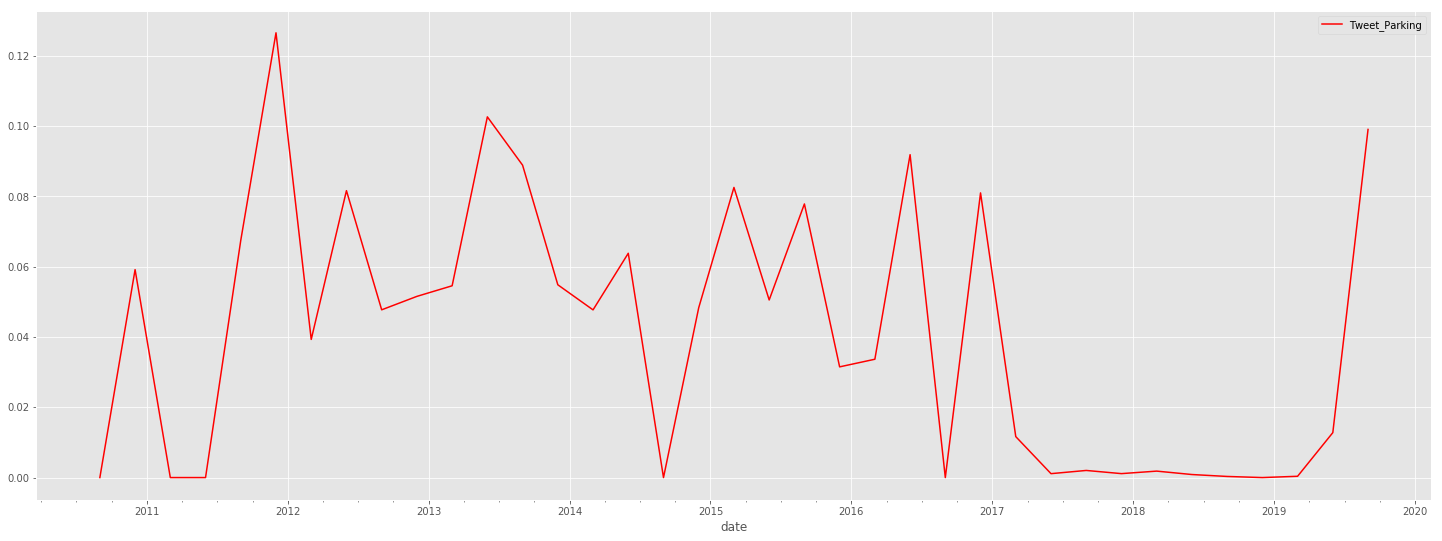

In [146]:
parkdf['date'] = pd.to_datetime(parkdf['date'])
parkdf.index = parkdf['date']
parkdf.resample('3M').mean()['Tweet_Parking'].plot(figsize=(25, 9), color='r', legend='True');




#parkdf.Tweet_Parking['2019'].sort_index()

In [147]:
parkdf.head()

,date,favorites,hashtags,mentions,replies,retweets,text,to,username,tweet_clean,tweet_sentiment,vader_pos,Tweet_Parking,vader_neu,vader_comp
date,,,,,,,,,,,,,,,
2014-12-28 05:53:11,2014-12-28 05:53:11,0,#asia #china #shenzhen #Beijing #EDM #HongKong...,NaN,0,0,"Golf at the parking?? Ye, Why not [呲牙] #asia #...",NaN,swed_official,Golf at the parking? Ye Why not [呲牙 #asia #chi...,neutral,0.000,0.000,1.000,0.0000
2014-11-26 10:45:27,2014-11-26 10:45:27,0,NaN,@Victoria,0,0,Parking lot @Victoria Harbour http://instagram...,NaN,loskaufmanos,Parking lot Harbour http://instagram.com/p/v3C...,neutral,0.000,0.000,1.000,0.0000
2014-11-13 04:36:14,2014-11-13 04:36:14,0,#badplanning,NaN,0,0,This is a legal parking space blocking a fire ...,NaN,glennhk,This is a legal parking space blocking a fire ...,negative,0.081,0.435,0.484,-0.7650
2014-11-10 06:34:12,2014-11-10 06:34:12,0,NaN,@alxdwn @brettking @RHaccart,2,0,@alxdwn @brettking @RHaccart Closed-loop syste...,alxdwn,jamesplloyd,Closed-loop system but allows for auto credit ...,neutral,0.185,0.000,0.815,0.5267
2014-11-09 09:44:52,2014-11-09 09:44:52,0,NaN,NaN,1,0,9 Big 30+ bus parked Infront of Central Police...,NaN,CafeLoisl,9 Big 30 bus parked Infront of Central Police ...,positive,0.000,0.000,1.000,0.0000


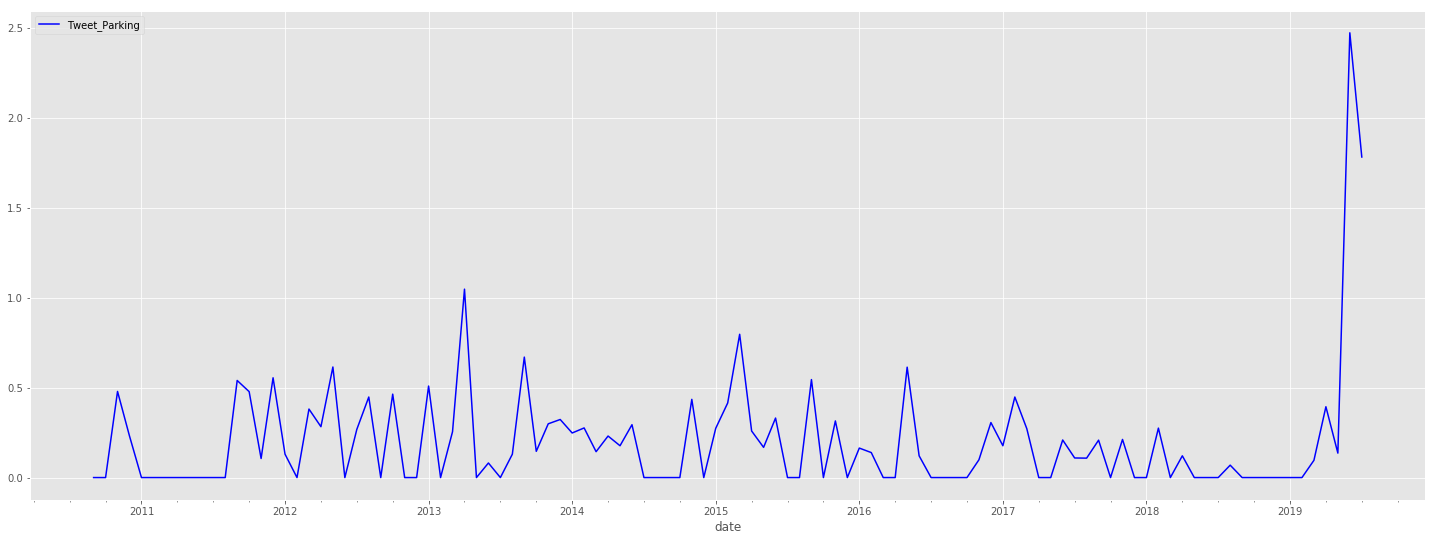

In [148]:
parkdf.resample('M').sum()['Tweet_Parking'].plot(figsize=(25, 9), color='b', legend='True');

In [149]:
df.drop(['hashtags', 'username', 'to', 'text', 'hashtag_clean', 
               'hashtag_sentiment', 'mentions', 'replies', 'retweets'], axis=1, inplace=True)

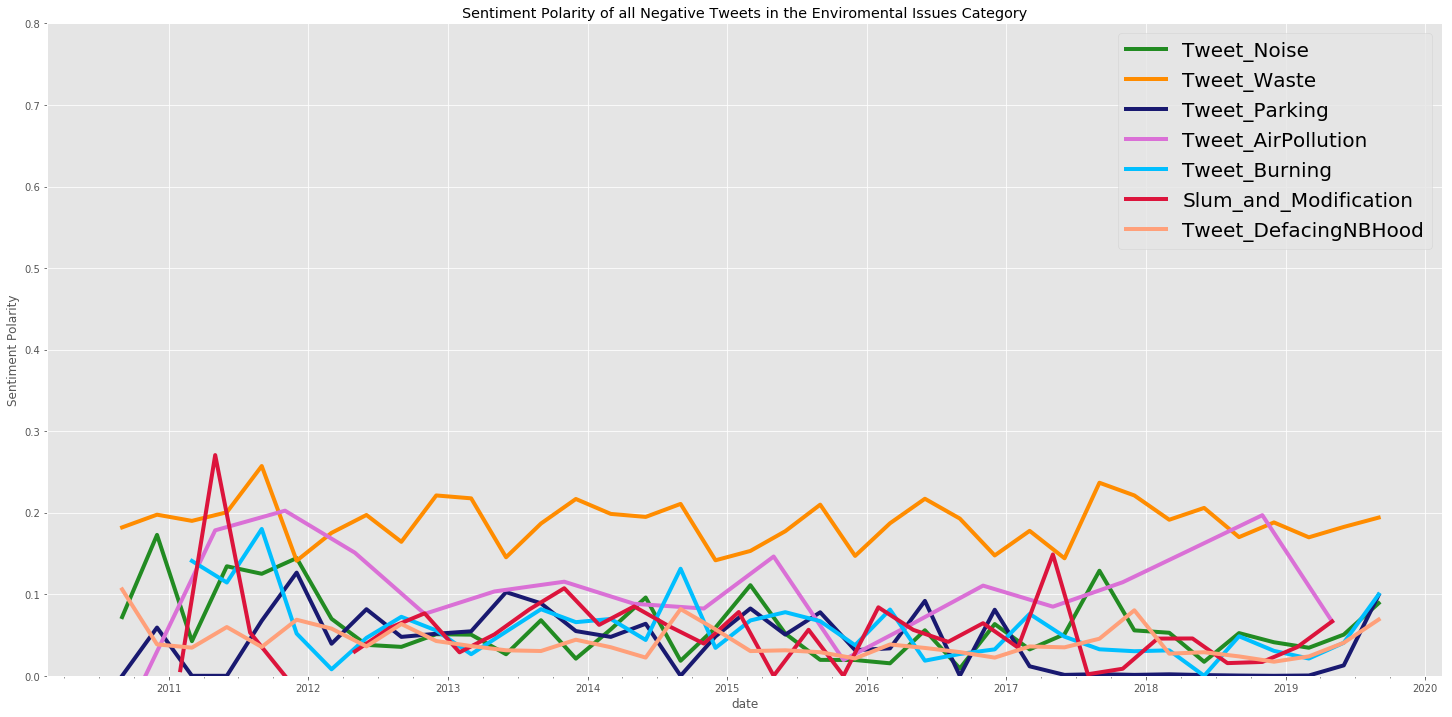

In [194]:
#df.pivot(index='date', columns='vader_neg').plot(marker='o')
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df.resample('3M').mean()['Tweet_Noise'].plot(figsize=(25, 9), 
                                             color='forestgreen', legend='True', linewidth=4,ylim=(0,1));


wastedf['date'] = pd.to_datetime(wastedf['date'])
wastedf.index = wastedf['date']
wastedf.resample('3M').mean()['Tweet_Waste'].plot(figsize=(25, 9), color='darkorange',
                                                  legend='True', linewidth=4,ylim=(0,1));



parkdf['date'] = pd.to_datetime(parkdf['date'])
parkdf.index = parkdf['date']
parkdf.resample('3M').mean()['Tweet_Parking'].plot(figsize=(25, 12), 
                                                color='midnightblue', legend='True', linewidth=4,ylim=(0,1));



airdf['date'] = pd.to_datetime(airdf['date'])
airdf.index = airdf['date']
airdf.resample('6M').mean()['Tweet_AirPollution'].plot(figsize=(25, 12),
                                              color='orchid', legend='True', linewidth=4,ylim=(0,1));


burndf['date'] = pd.to_datetime(burndf['date'])
burndf.index = burndf['date']
burndf.resample('3M').mean()['Tweet_Burning'].plot(figsize=(25, 12),
                                                color='deepskyblue', legend='True', linewidth=4,ylim=(0,1));



housedf['date'] = pd.to_datetime(housedf['date'])
housedf.index = housedf['date']
housedf.resample('3M').mean()['Slum_and_Modification'].plot(figsize=(25, 12),
                                                color='crimson', legend='True', linewidth=4,ylim=(0,1));




studentdf['date'] = pd.to_datetime(studentdf['date'])
studentdf.index = studentdf['date']
studentdf.resample('3M').mean()['Tweet_DefacingNBHood'].plot(figsize=(25, 12),
                                                color= 'lightsalmon', 
                                                legend='True', linewidth=4,ylim=(0,.8),
                                                title='Sentiment Polarity of all Negative Tweets in the Enviromental Issues Category');


plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Enviromental Issues Sentiments Polarity.png')

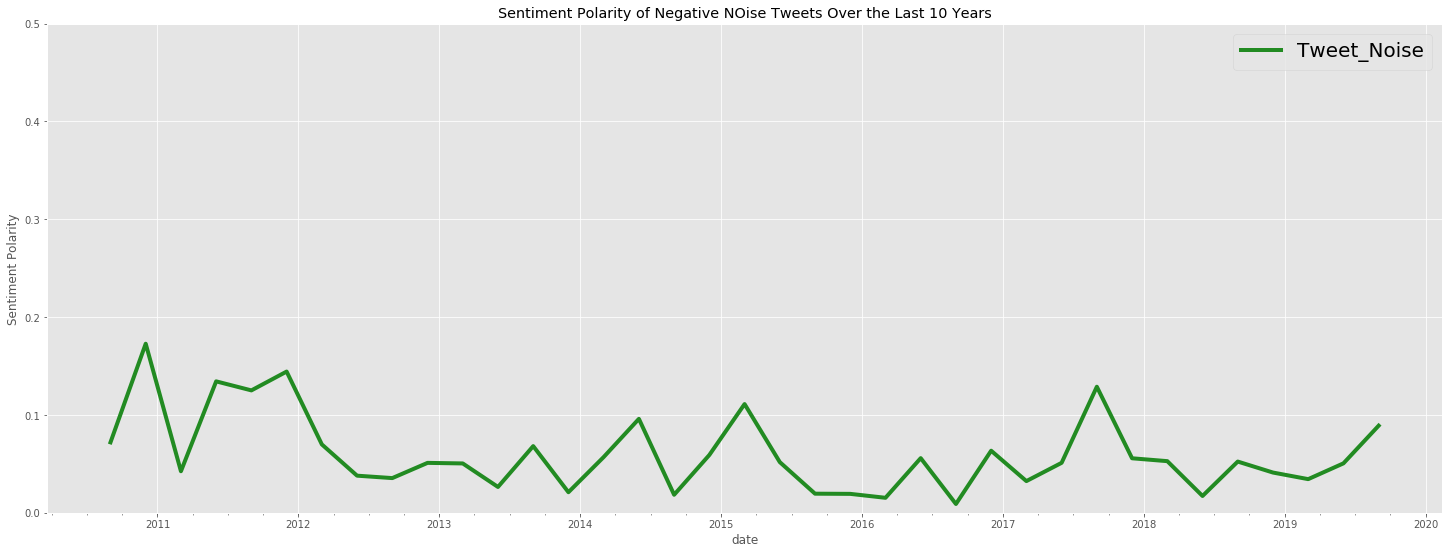

In [166]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df.resample('3m').mean()['Tweet_Noise'].plot(figsize=(25, 9), 
                                             color='forestgreen', 
                                             legend='True', linewidth=4,ylim=(0,.5),
                                            title= 'Sentiment Polarity of Negative NOise Tweets Over the Last 10 Years');


plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Noise sentiment polarity.png')

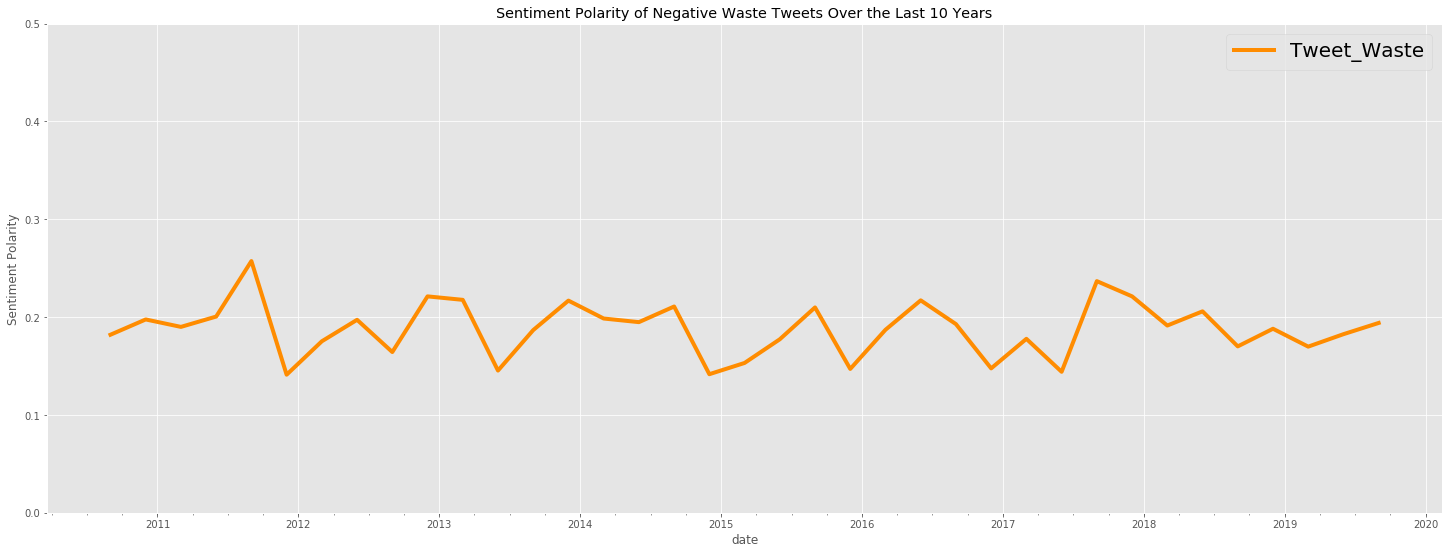

In [165]:
wastedf['date'] = pd.to_datetime(wastedf['date'])
wastedf.index = wastedf['date']
wastedf.resample('3M').mean()['Tweet_Waste'].plot(figsize=(25, 9), color='darkorange',
                                                  legend='True', linewidth=4,ylim=(0,.5),
                                                 title = 'Sentiment Polarity of Negative Waste Tweets Over the Last 10 Years');



plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Waste_sentiment_polarity.png')

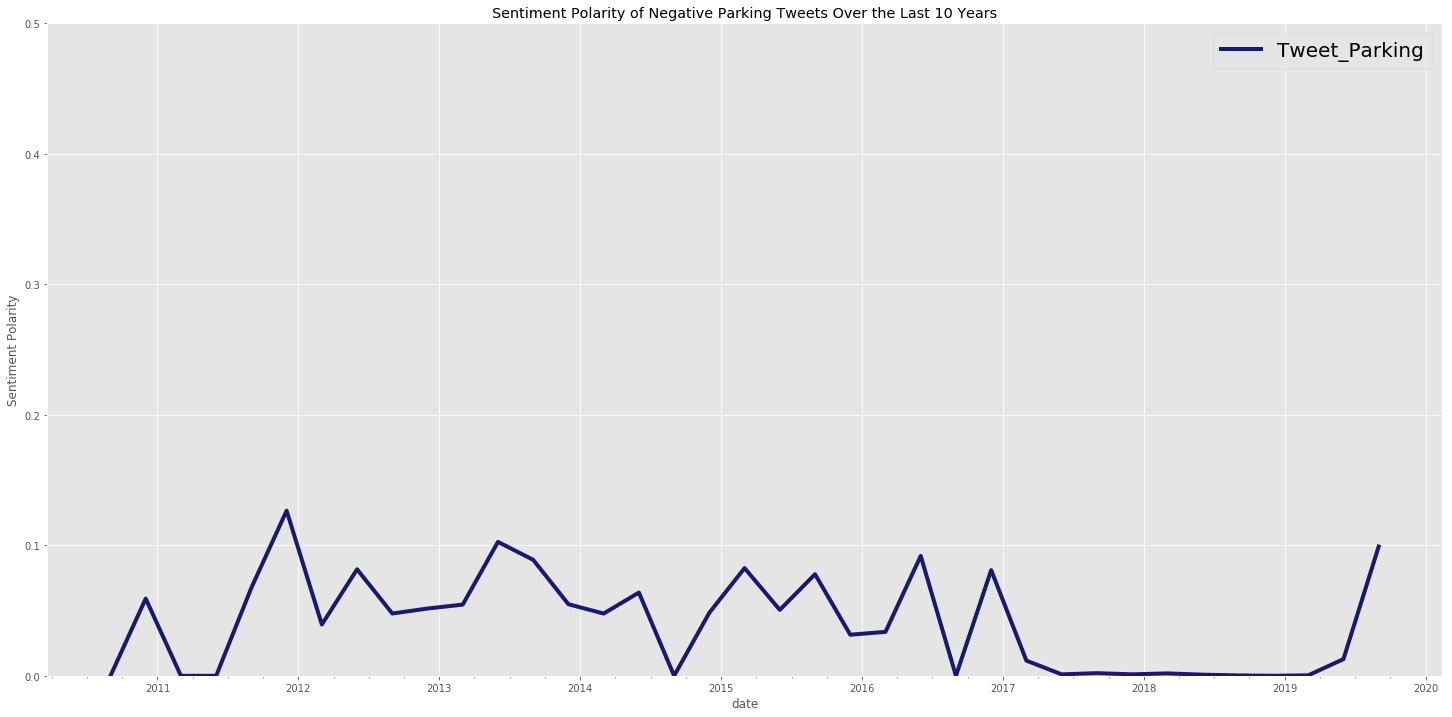

In [174]:
parkdf['date'] = pd.to_datetime(parkdf['date'])
parkdf.index = parkdf['date']
parkdf.resample('3M').mean()['Tweet_Parking'].plot(figsize=(25, 12), 
                                                color='midnightblue', legend='True', linewidth=4,ylim=(0,.5),
                                                   title = 'Sentiment Polarity of Negative Parking Tweets Over the Last 10 Years');



plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Parking sentiment polarity.png')

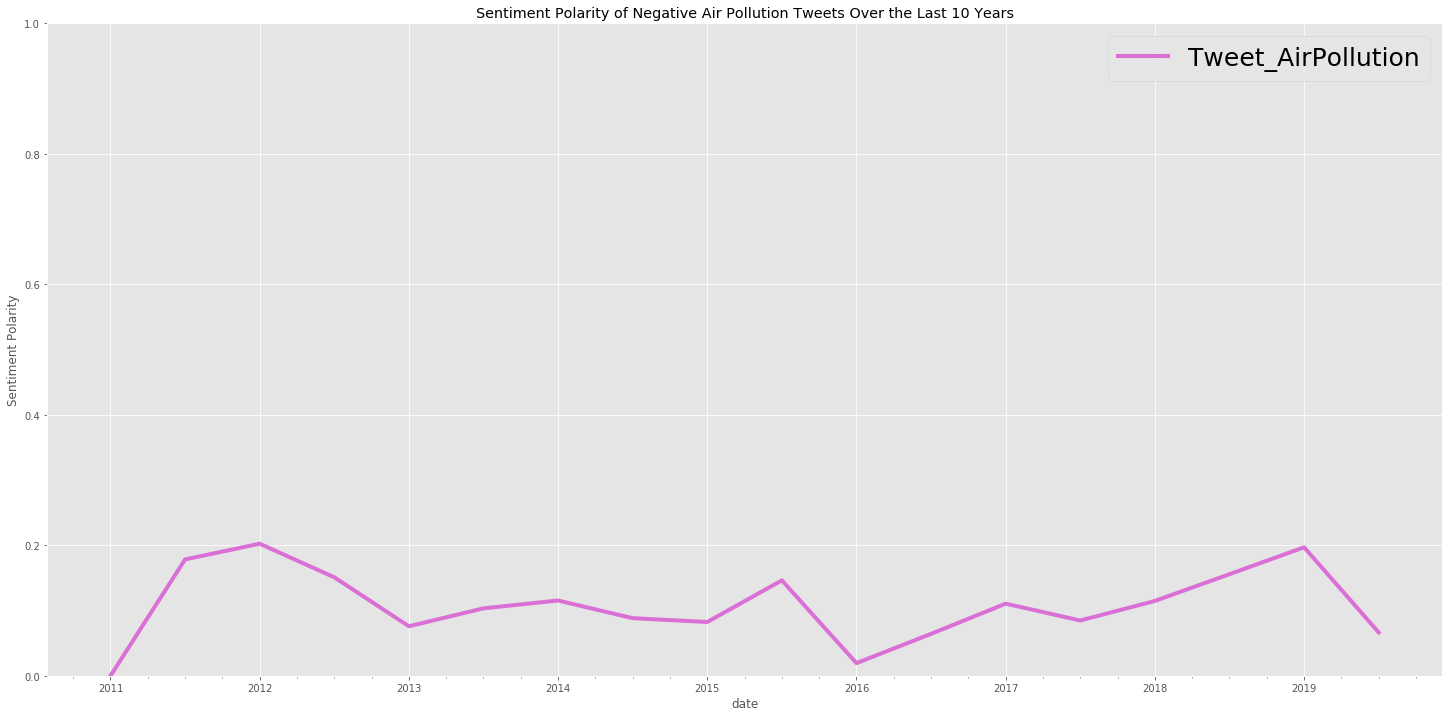

In [176]:
airdf['date'] = pd.to_datetime(airdf['date'])
airdf.index = airdf['date']
airdf.resample('6M').mean()['Tweet_AirPollution'].plot(figsize=(25, 12),
                                              color='orchid', legend='True', linewidth=4, ylim=(0,1),
                                                       title = 'Sentiment Polarity of Negative Air Pollution Tweets Over the Last 10 Years');





plt.legend(prop={'size':25})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Air sentiment polarity.png')

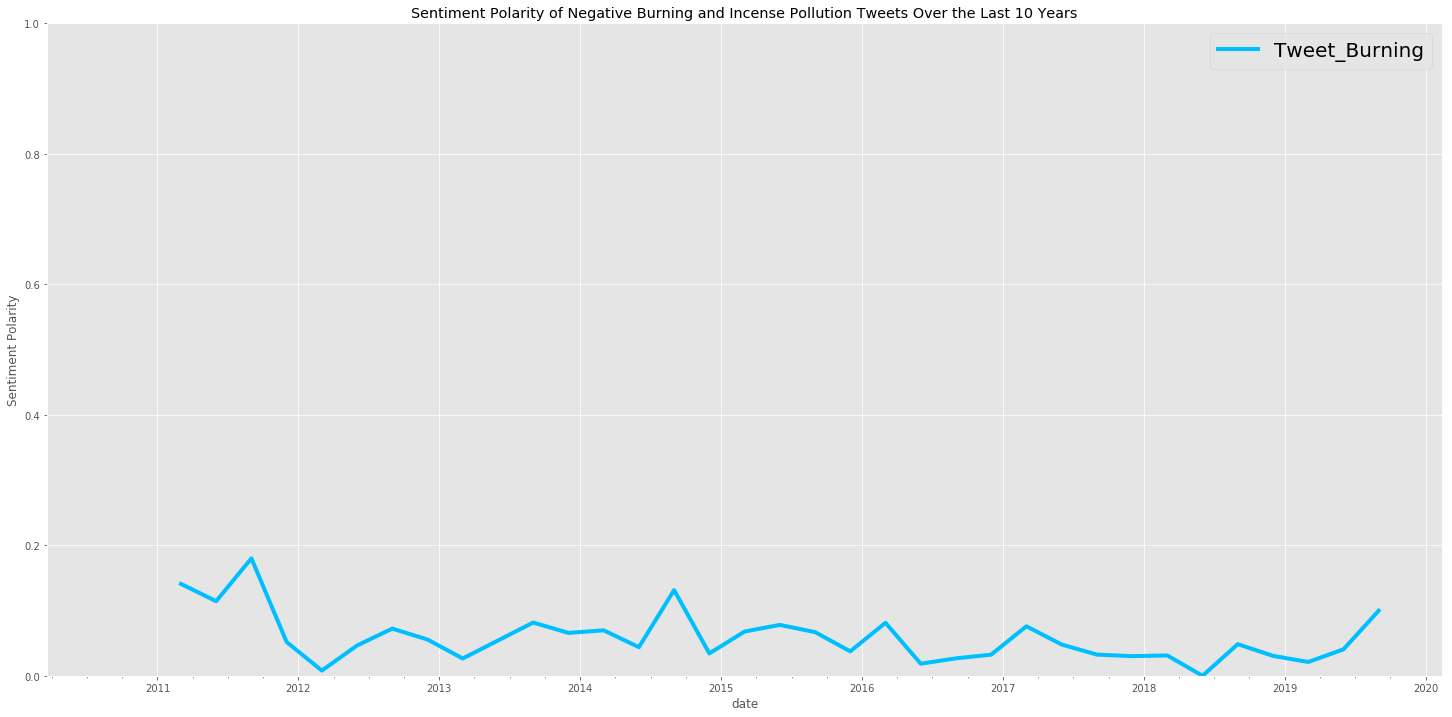

In [190]:
burndf['date'] = pd.to_datetime(burndf['date'])
burndf.index = burndf['date']
burndf.resample('3M').mean()['Tweet_Burning'].plot(figsize=(25, 12),
                                                color='deepskyblue', legend='True', linewidth=4,ylim=(0,1),
                                                  title = 'Sentiment Polarity of Negative Burning and Incense Pollution Tweets Over the Last 10 Years');







plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Burning sentiment polarity.png')

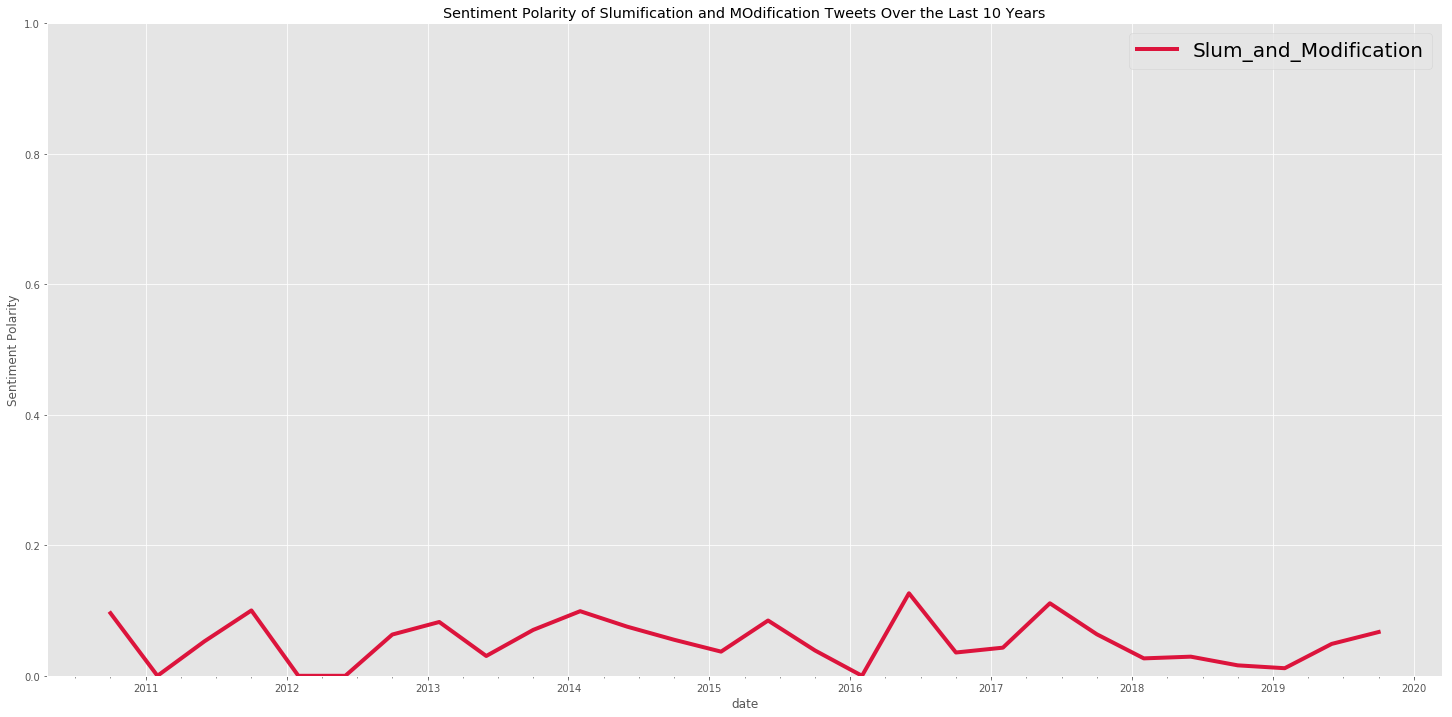

In [188]:
housedf['date'] = pd.to_datetime(housedf['date'])
housedf.index = housedf['date']
housedf.resample('4M').mean()['Slum_and_Modification'].plot(figsize=(25, 12),
                                                color='crimson', legend='True', linewidth=4,ylim=(0,1),
                                                           title = 'Sentiment Polarity of Slumification and MOdification Tweets Over the Last 10 Years');






plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Slumification sentiment polarity.png')

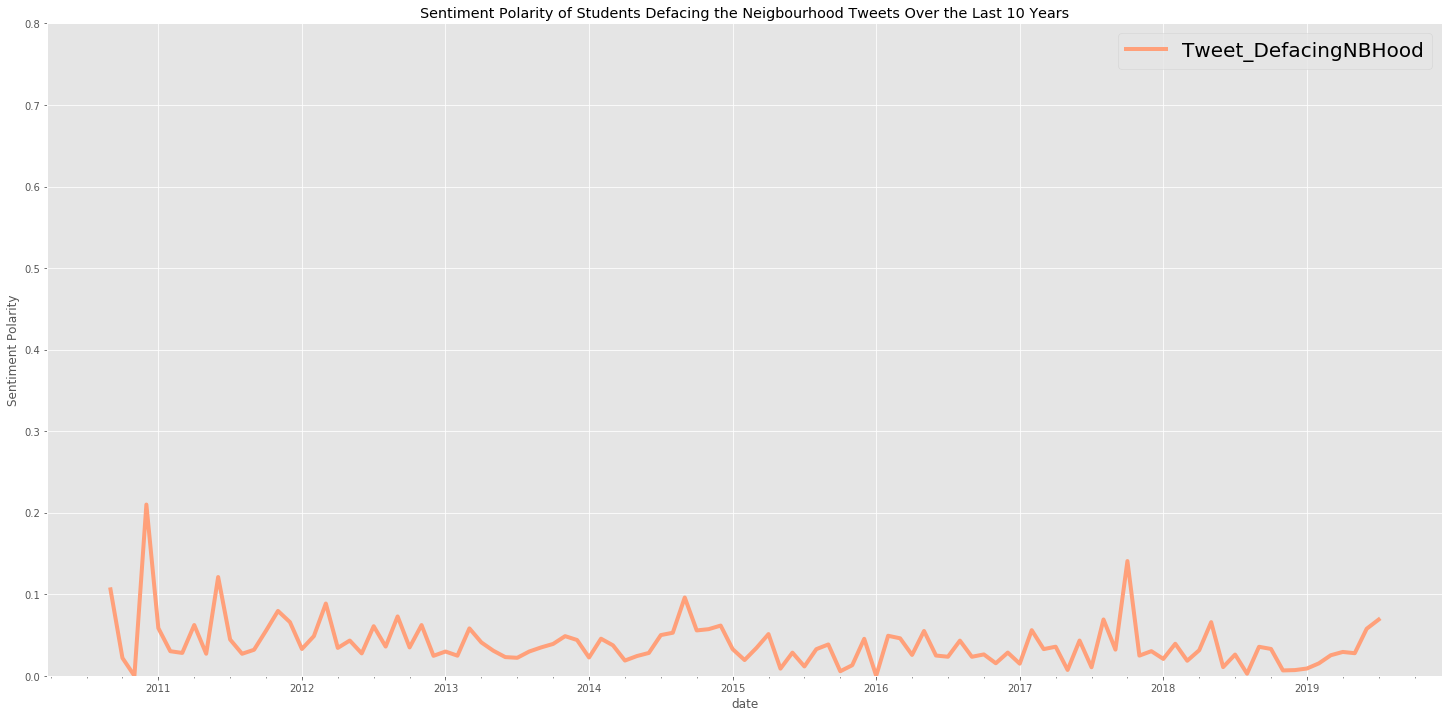

In [186]:
studentdf['date'] = pd.to_datetime(studentdf['date'])
studentdf.index = studentdf['date']
studentdf.resample('M').mean()['Tweet_DefacingNBHood'].plot(figsize=(25, 12),
                                                color= 'lightsalmon', 
                                                legend='True', linewidth=4,ylim=(0,.8),
                                                title = 'Sentiment Polarity of Students Defacing the Neigbourhood Tweets Over the Last 10 Years');





plt.legend(prop={'size':20})

plt.ylabel('Sentiment Polarity');

plt.savefig('plots/Students Defacing sentiment polarity.png')

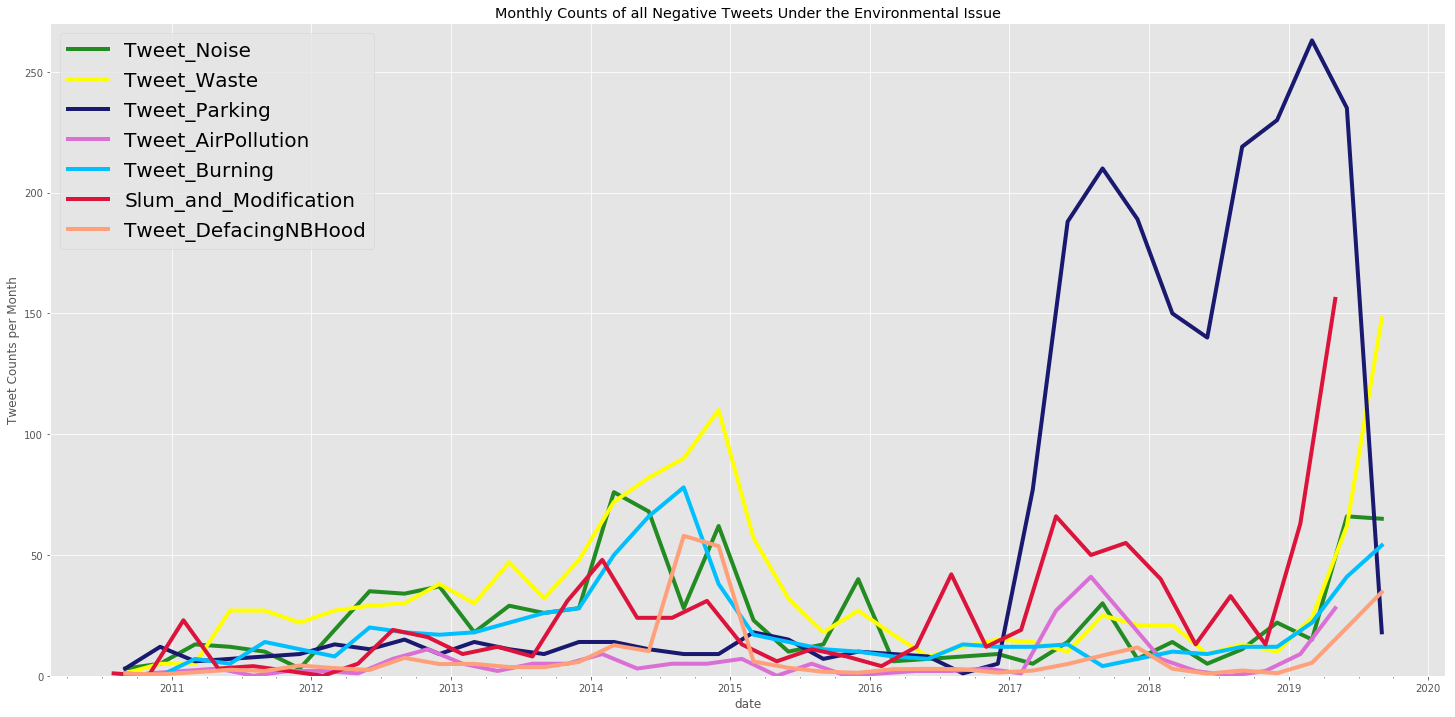

In [193]:
#df.pivot(index='date', columns='vader_neg').plot(marker='o')
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df.resample('3M').count()['Tweet_Noise'].plot(figsize=(25, 9), 
                                             color='forestgreen', legend='True', linewidth=4,ylim=(0,1));


wastedf['date'] = pd.to_datetime(wastedf['date'])
wastedf.index = wastedf['date']
wastedf.resample('3M').count()['Tweet_Waste'].plot(figsize=(25, 9), color='yellow',
                                                  legend='True', linewidth=4,ylim=(0,1));



parkdf['date'] = pd.to_datetime(parkdf['date'])
parkdf.index = parkdf['date']
parkdf.resample('3M').count()['Tweet_Parking'].plot(figsize=(25, 12), 
                                                color='midnightblue', legend='True', linewidth=4,ylim=(0,1));



airdf['date'] = pd.to_datetime(airdf['date'])
airdf.index = airdf['date']
airdf.resample('3M').count()['Tweet_AirPollution'].plot(figsize=(25, 12),
                                              color='orchid', legend='True', linewidth=4,ylim=(0,1));


burndf['date'] = pd.to_datetime(burndf['date'])
burndf.index = burndf['date']
burndf.resample('3M').count()['Tweet_Burning'].plot(figsize=(25, 12),
                                                color='deepskyblue', legend='True', linewidth=4,ylim=(0,1));



housedf['date'] = pd.to_datetime(housedf['date'])
housedf.index = housedf['date']
housedf.resample('3M').count()['Slum_and_Modification'].plot(figsize=(25, 12),
                                                color='crimson', legend='True', linewidth=4,ylim=(0,1));




studentdf['date'] = pd.to_datetime(studentdf['date'])
studentdf.index = studentdf['date']
studentdf.resample('3M').sum()['Tweet_DefacingNBHood'].plot(figsize=(25, 12),
                                                color= 'lightsalmon', legend='True', 
                                                linewidth=4,ylim=(0,270),
                                                title='Monthly Counts of all Negative Tweets Under the Environmental Issue');


plt.legend(prop={'size':20})
plt.ylabel('Tweet Counts per Month');
plt.savefig('plots/Count of all environmental Issues.png')


In [ ]:
#parkdf['date'] = pd.to_datetime(parkdf['date'])
#parkdf.index = parkdf['date']
#parkdf.resample('M').count()['Tweet_Parking'].plot(figsize=(25, 9), color='k');


In [ ]:
#test = parkdf.drop(['date, favorites,'])

In [ ]:
#parkdf['Tweet_Parking'].resample('M').count()#

In [ ]:
#parkdf.resample('M').count()['Tweet_Parking']

In [ ]:
#wastedf['date'] = pd.to_datetime(wastedf['date'])
#wastedf.index = wastedf['date']
#wastedf.resample('M').count()['Tweet_Waste'].plot(figsize=(25, 9));


In [ ]:
#df['date'] = pd.to_datetime(df['date'])
#df.index = df['date']
#df.resample('M').count()['Tweet_Noise'].plot(figsize=(25, 9), color='b');


In [ ]:
#df['date'] = pd.to_datetime(df['date'])

#df.dtypes

In [ ]:
#df.drop(['date', 'favorites', 'tweet_clean', 'tweet_sentiment'], axis=1, inplace=True)

In [ ]:
#df.head()

In [ ]:
#r.plot(linewidth=1.5, figsize=(25, 9), marker='.',
#                                 title='10 Yeavader_neurs Variations in Noise Sentiments');

In [ ]:
#r=df.drop(['vader_neu', 'vader_pos','replies', 'retweets','vader_comp'],  axis=1)

In [ ]:
#ax = df.loc['2018', 'Tweet_Noise'].plot(color='black', marker='.', figsize=(25, 9), 
#                                           title = 'Noise Sentiments for the Year 2018')
#ax = plt.plot(noisedf.loc['2015', 'noise_enc1']), #plt.plot(noisedf.loc['2013', 'noise_enc1']);
#plt.plot(noisedf.loc['2013', 'noise_enc']);
#ax.set_ylabel('Tweets -1-Neg, 0-Neu, 1-Pos');
#plt.savefig('noise_sentiments - 2018.png')
#plt.close('all')

In [ ]:
#compound = df.drop(['vader_neu', 'vader_pos', 'vader_comp'],  axis=1)

#compound.plot(linewidth=1.8, figsize=(25, 10), marker='.',color='blue');
                                 #title='10 Yeavader_neurs Variations in Noise Sentiments');

In [ ]:
#compound.loc['2013':'2018', 'vader_neg'].plot(figsize=(25, 9));